In [1]:
#https://www.idealista.pt/media/relatorios-preco-habitacao/venda/lisboa/historico/
#Historico de preços

#my user agent
"""Mozilla/5.0 (Windows NT 10.0; Win64; x64)
    AppleWebKit/537.36 (KHTML, like Gecko)
    Chrome/114.0.0.0 Safari/537.36"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# **TODOS BAIRROS**

In [2]:
bairros_link = [
"https://supercasa.pt/comprar-casas/lisboa/santa-clara/",
"https://supercasa.pt/comprar-casas/lisboa/lumiar/",
"https://supercasa.pt/comprar-casas/lisboa/carnide/",
"https://supercasa.pt/comprar-casas/lisboa/benfica/",
"https://supercasa.pt/comprar-casas/lisboa/marvila/",
"https://supercasa.pt/comprar-casas/lisboa/alvalade/",
"https://supercasa.pt/comprar-casas/lisboa/sao-domingos-de-benfica/",
"https://supercasa.pt/comprar-casas/lisboa/areeiro",
"https://supercasa.pt/comprar-casas/lisboa/avenidas-novas/",
"https://supercasa.pt/comprar-casas/lisboa/campolide/",
"https://supercasa.pt/comprar-casas/lisboa/belem/",
"https://supercasa.pt/comprar-casas/lisboa/ajuda/",
"https://supercasa.pt/comprar-casas/lisboa/alcantara/",
"https://supercasa.pt/comprar-casas/lisboa/campo-de-ourique/",
"https://supercasa.pt/comprar-casas/lisboa/estrela/",
"https://supercasa.pt/comprar-casas/lisboa/santo-antonio/",
"https://supercasa.pt/comprar-casas/lisboa/misericordia/",
"https://supercasa.pt/comprar-casas/lisboa/arroios/",
"https://supercasa.pt/comprar-casas/lisboa/santa-maria-maior/",
"https://supercasa.pt/comprar-casas/lisboa/sao-vicente/",
"https://supercasa.pt/comprar-casas/lisboa/penha-de-franca/",
"https://supercasa.pt/comprar-casas/lisboa/beato/",
"https://supercasa.pt/comprar-casas/lisboa/parque-das-nacoes/",
"https://supercasa.pt/comprar-casas/lisboa/olivais/"]


bairros_link[23]

'https://supercasa.pt/comprar-casas/lisboa/olivais/'

In [3]:
# "BAIRROS NAMES"

bairros = ["santa-clara", "lumiar", "carnide", "benfica", "marvila", "alvalade", "sao-domingos-de-benfica", "areeiro", "avenidas-novas", "campolide", "belem", "ajuda", "alcantara", "campo-de-ourique", "estrela", "santo-antonio", "misericordia", "arroios", "santa-maria-maior", "sao-vicente", "penha-de-franca", "beato", "parque-das-nacoes", "olivais"]
len(bairros)


24

In [4]:
def get_houses_all (pages, n):
  new_bairro = {}
  count = 0
  #######################################
  url = bairros_link[n]
  response = requests.get(url)

  soup = BeautifulSoup(response.content)



  for page in range(1,pages+1):  #we need to change the url respecting users input
      new_url = f"{url}pagina-{page}"
      r = requests.get(new_url)
      soup = BeautifulSoup(r.content)
      homes = soup.find_all("div", attrs ={"class":"property big-picture"})

      for i in homes: #find intern func
          price = i.find_all("div", attrs={"class": "property-price"})[0].get_text().strip()
          size_text = i.find_all("div", attrs={"class": "property-features"})[0].get_text().strip()
          zone = i.find_all("h2", attrs={"class": "property-list-title"})[0].get_text().strip()


          num_rooms_match = re.search(r'(\d+)\s+quartos', size_text)
          num_rooms = int(num_rooms_match.group(1)) if num_rooms_match else None

          area_match = re.search(r'Área bruta (\d+)\s+m²', size_text)
          area = int(area_match.group(1)) if area_match else None

          terrain_match = re.search(r'Terreno (\d+)\s+m²' , size_text)
          terrain = int(terrain_match.group(1)) if terrain_match else None


          new_bairro[count] = {"Price": price,
                                "Num Rooms": num_rooms,
                                "Area (m²)": area,
                                "Terrain (m²)": terrain,
                                "Zone": zone}
          count += 1



  return pd.DataFrame.from_dict(new_bairro, orient="index")

In [5]:
#RUN ALL NEIG IN PAGE

bairro_dic = {}
for x in range(0,len(bairros)):
  new_bairro = get_houses_all(20,x)
  bairro_dic[bairros[x]] = new_bairro
  bairro_dic[bairros[x]]["district"] = bairros[x]


  # bairro_dic[bairros[x]]["Price"] = new_bairro['Price'].apply(lambda x: int(re.sub(r'\D', '', x)))
  # bairro_dic[bairros[x]]["value_m2"] = round(new_bairro["Price"]/new_bairro["Area (m²)"],2)
  # bairro_dic[bairros[x]]["Area (m²)"]=pd.to_numeric(new_bairro['Area (m²)'], errors="coerce") ###


In [6]:
lista_frames = list(bairro_dic.values())
result = pd.concat(lista_frames)
result

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district
0,415.000 €,3.0,116.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
1,234.000 €,3.0,135.0,None,"Apartamento T3 na Rua Barata Feyo, Santa Clara...",santa-clara
2,287.000 €,NaN,69.0,None,"Apartamento T1 em Santa Clara, Lisboa",santa-clara
3,620.000 €,3.0,147.0,None,"Apartamento T3 em Calçada do Poço, Santa Clara...",santa-clara
4,375.000 €\r\n \n\n395.000 €\n↓\n5%,3.0,124.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
5,280.000 €,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
0,338.000 €,2.0,84.0,NaN,"Apartamento T2 em Lumiar, Lisboa",lumiar
1,1.175.000 €,5.0,215.0,NaN,Moradia T5 Duplex na Rua Professor Mark Athias...,lumiar
2,450.000 €\r\n \n\n470.000 €\n↓\n4%,4.0,114.0,378.0,"Apartamento T4 em Lumiar, Lisboa",lumiar
3,875.000 €,4.0,179.0,NaN,"Apartamento T4 em Lumiar, Lisboa",lumiar


In [7]:
new_data = result
new_data = new_data.drop(new_data[new_data['Price'].str.contains('%')].index)
new_data

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district
5,280.000 €,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
5,539.000 €,3.0,150.0,NaN,"Apartamento T3 em Praça Rainha Santa, Lumiar, ...",lumiar
6,620.000 €,3.0,150.0,177.0,"Apartamento T3 em Lumiar, Lisboa",lumiar
8,1.995.000 €,5.0,295.0,226.0,"Moradia Geminada T5 em Lumiar, Lisboa",lumiar
9,569.000 €,3.0,134.0,NaN,"Apartamento T3 em Lumiar, Lisboa",lumiar
10,740.000 €,3.0,134.0,NaN,"Apartamento T3 em Lumiar, Lisboa",lumiar
11,360.000 €,NaN,96.0,NaN,"Apartamento T1 em Lumiar, Lisboa",lumiar
12,4.000.000 €,15.0,NaN,NaN,"Quinta T15 em Lumiar, Lisboa",lumiar
5,6.000.000 €,7.0,NaN,None,"Palacete T7 em Carnide, Lisboa",carnide
6,999.000 €,4.0,300.0,None,"Moradia T4 em Carnide, Lisboa",carnide


In [8]:
new_data['Price'] = new_data['Price'].apply(lambda x: int(re.sub(r'\D', '', x)))
new_data

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district
5,280000,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
5,539000,3.0,150.0,NaN,"Apartamento T3 em Praça Rainha Santa, Lumiar, ...",lumiar
6,620000,3.0,150.0,177.0,"Apartamento T3 em Lumiar, Lisboa",lumiar
8,1995000,5.0,295.0,226.0,"Moradia Geminada T5 em Lumiar, Lisboa",lumiar
9,569000,3.0,134.0,NaN,"Apartamento T3 em Lumiar, Lisboa",lumiar
10,740000,3.0,134.0,NaN,"Apartamento T3 em Lumiar, Lisboa",lumiar
11,360000,NaN,96.0,NaN,"Apartamento T1 em Lumiar, Lisboa",lumiar
12,4000000,15.0,NaN,NaN,"Quinta T15 em Lumiar, Lisboa",lumiar
5,6000000,7.0,NaN,None,"Palacete T7 em Carnide, Lisboa",carnide
6,999000,4.0,300.0,None,"Moradia T4 em Carnide, Lisboa",carnide


In [9]:
new_data["value_m2"] = round(new_data["Price"]/new_data["Area (m²)"],2)
new_data.head()

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district,value_m2
5,280000,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara,3076.92
5,539000,3.0,150.0,NaN,"Apartamento T3 em Praça Rainha Santa, Lumiar, ...",lumiar,3593.33
6,620000,3.0,150.0,177.0,"Apartamento T3 em Lumiar, Lisboa",lumiar,4133.33
8,1995000,5.0,295.0,226.0,"Moradia Geminada T5 em Lumiar, Lisboa",lumiar,6762.71
9,569000,3.0,134.0,NaN,"Apartamento T3 em Lumiar, Lisboa",lumiar,4246.27


In [10]:
new_data = new_data.drop(['Terrain (m²)', 'Zone'], axis=1)
new_data

,Price,Num Rooms,Area (m²),district,value_m2
5,280000,3.0,91.0,santa-clara,3076.92
5,539000,3.0,150.0,lumiar,3593.33
6,620000,3.0,150.0,lumiar,4133.33
8,1995000,5.0,295.0,lumiar,6762.71
9,569000,3.0,134.0,lumiar,4246.27
10,740000,3.0,134.0,lumiar,5522.39
11,360000,NaN,96.0,lumiar,3750.00
12,4000000,15.0,NaN,lumiar,NaN
5,6000000,7.0,NaN,carnide,NaN
6,999000,4.0,300.0,carnide,3330.00


In [11]:
new_data['value_m2'].isna().sum()
len(new_data)

638

In [12]:
new_data = new_data.dropna(subset=['value_m2'])
new_data.head()

,Price,Num Rooms,Area (m²),district,value_m2
5,280000,3.0,91.0,santa-clara,3076.92
5,539000,3.0,150.0,lumiar,3593.33
6,620000,3.0,150.0,lumiar,4133.33
8,1995000,5.0,295.0,lumiar,6762.71
9,569000,3.0,134.0,lumiar,4246.27


In [13]:
new_data.to_excel("district_data.xlsx")

In [14]:
new_data

,Price,Num Rooms,Area (m²),district,value_m2
5,280000,3.0,91.0,santa-clara,3076.92
5,539000,3.0,150.0,lumiar,3593.33
6,620000,3.0,150.0,lumiar,4133.33
8,1995000,5.0,295.0,lumiar,6762.71
9,569000,3.0,134.0,lumiar,4246.27
10,740000,3.0,134.0,lumiar,5522.39
11,360000,NaN,96.0,lumiar,3750.00
6,999000,4.0,300.0,carnide,3330.00
5,489900,3.0,100.0,benfica,4899.00
6,329900,NaN,65.0,benfica,5075.38


In [15]:
media_por_grupo = new_data.groupby('district')['value_m2'].mean().round(2)
media_por_grupo

district
ajuda                       5913.57
alcantara                   6797.67
alvalade                    5853.38
arroios                     5521.71
avenidas-novas              7115.41
beato                       3172.70
belem                       6850.65
benfica                     5976.51
campo-de-ourique            5962.28
campolide                   6453.32
carnide                     3330.00
estrela                     7246.04
lumiar                      4668.00
marvila                     5795.93
misericordia                8253.16
olivais                     6149.45
parque-das-nacoes          10444.86
penha-de-franca             5387.58
santa-clara                 3076.92
santa-maria-maior           5822.69
santo-antonio               8841.47
sao-domingos-de-benfica     5043.49
sao-vicente                 5504.46
Name: value_m2, dtype: float64

In [16]:
mean_value = new_data['value_m2'].mean().round(2)
mean_value

6570.67

In [17]:
new_data.describe().round(2)

,Price,Num Rooms,Area (m²),value_m2
count,507.00,357.00,507.00,507.00
mean,826686.88,2.89,124.40,6570.67
std,751618.62,1.19,85.38,4130.60
min,130000.00,2.00,4.00,1374.50
25%,385000.00,2.00,70.00,4774.70
50%,550000.00,3.00,100.00,5905.51
75%,980000.00,3.00,149.50,7541.32
max,5650000.00,12.00,775.00,82475.00


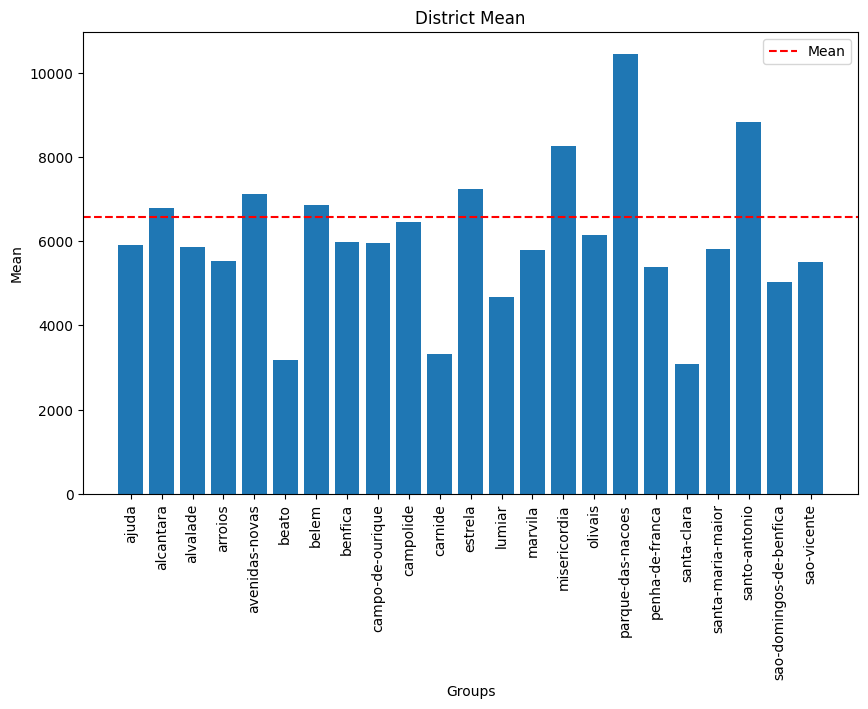

In [18]:

plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.bar(media_por_grupo.index, media_por_grupo.values)
plt.xlabel('Groups')
plt.ylabel('Mean')
plt.title('District Mean')
plt.xticks(rotation=90)

plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.legend()  # Mostrar a legenda com a linha da mediana
plt.savefig("District_Mean.png")
plt.show()

In [19]:
qtd_freg = new_data['district'].value_counts()
contagem = pd.DataFrame(qtd_freg).rename(columns={'index': 'district', 'district': 'value_counts'})
contagem

,value_counts
benfica,71
avenidas-novas,44
santo-antonio,44
estrela,39
arroios,38
sao-vicente,31
penha-de-franca,30
alvalade,28
campolide,24
misericordia,24


In [20]:
house_mean = int(contagem.mean())
house_mean

22

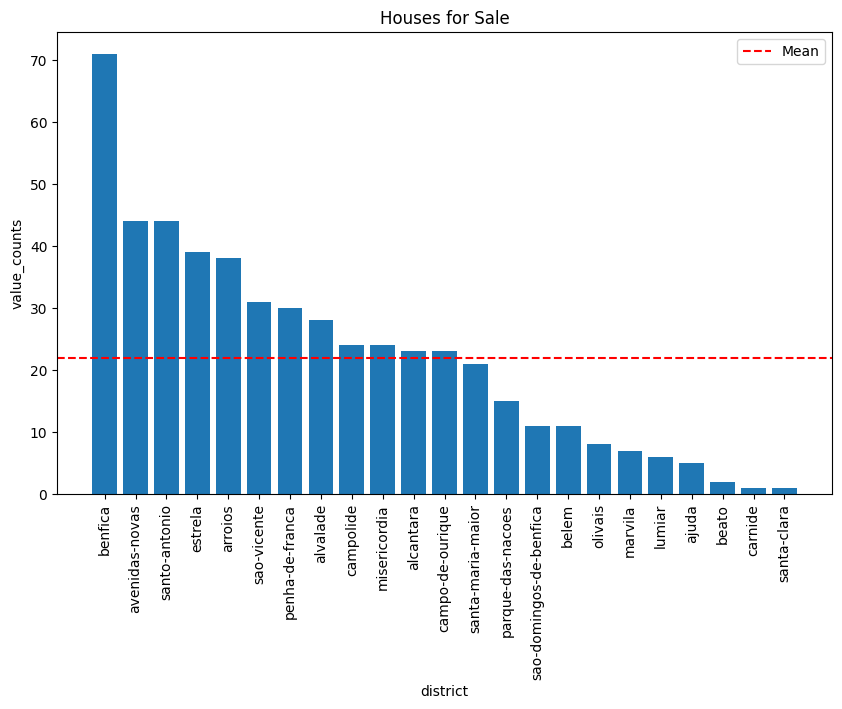

In [21]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.bar(contagem.index, contagem['value_counts'])
plt.xlabel('district')
plt.ylabel('value_counts')
plt.title('Houses for Sale')
plt.xticks(rotation=90)

plt.axhline(house_mean, color='red', linestyle='--', label='Mean')
plt.legend()  # Mostrar a legenda com a linha da mediana
plt.savefig("Houses_for_Sale.png")
plt.show()

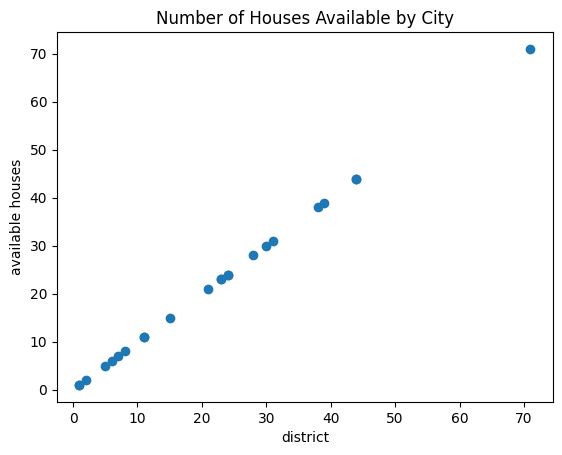

In [22]:
plt.scatter(contagem, contagem['value_counts'])
plt.xlabel('district')
plt.ylabel('available houses')
plt.title('Number of Houses Available by City')

plt.show()

In [ ]:
# count_freguesias = new_data.groupby('district').size()

# # Definir os tamanhos dos pontos com base nas contagens
# sizes = count_freguesias * 10  # Ajuste o multiplicador conforme necessário

# plt.figure(figsize=(10, 6))
# plt.scatter(qtd_freg['value_m2'], qtd_freg['district'], s=20)
# plt.xlabel('value_m2')
# plt.ylabel('District')
# plt.title('District Value')

# plt.show()